# Assignment

Use the "from the expert" (FTE) jupyter notebook as a starter for this assignment, and ask your instructor questions if you need help.

Use our saved churn data from week 2 with machine learning to predict if customers will churn or not, similar to what we did in the FTE:

- break up data into features and targets
- split data into train and test sets
- use at least one ML model to fit to the training data
- evaluate performance on the train and test sets: at least evaluate accuracy and compare it with the "no information rate"
- plot a confusion matrix
- write something describing how the ML algorithm could be used in a business setting
- Write a short summary of what you did with the overall process - describe any important EDA findings, data cleaning and preparation, modeling, and evaluation in your summary.

*Optional*: For an addition challenge, try the following:
- fit more ML models and compare their scores
- optimize the hyperparameters of your models
- examine more metrics such as the classification report and ROC/AUC
- plot the distribution of the probability predictions (from the `predict_proba()` function from our model) for each class (1s and 0s)

### DS process status

Here is our data science process, and where we are (#4):

**1. Business understanding**

Can we use machine learning to predict if a customer will churn before they leave?

**2. Data understanding**

Week 1 - EDA and visualization.

**3. Data preparation**

Last week - cleaning and feature engineering.


**4. Modeling**

This week.
Fit a ML model to the data.


**5. Evaluation**

This week.
Check the performance of our models and evaluate how it fits our goals from step 1.


**6. Deployment**

This week.
Describe how the model might be deployed and used at the business. Will there be an API that customer service reps can use when customers call? Should there be a system where a report gets sent to someone in customer retention or marketing with at-risk customers? We should really think about these things in the first step, although we can consider them here this time.

# Week 3 - Tyler Osterberg Assignment

### Prep

In [1]:
# Stopping numpy from multithreading incorrectly in virtualenv
import os
os.environ['OPENBLAS_NUM_THREADS'] = '1'

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score

In [2]:
raw_data = pd.read_csv('prepped_churn_data.csv', index_col='customerID')
raw_data

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,AutoPay,Churn
customerID,,,,,,,,
7590-VHVEG,1,0,0,0,29.85,29.85,0,0
5575-GNVDE,34,1,1,1,56.95,1889.50,0,0
3668-QPYBK,2,1,0,1,53.85,108.15,0,1
7795-CFOCW,45,0,1,2,42.30,1840.75,1,0
9237-HQITU,2,1,0,0,70.70,151.65,0,1
...,...,...,...,...,...,...,...,...
6840-RESVB,24,1,1,1,84.80,1990.50,0,0
2234-XADUH,72,1,1,3,103.20,7362.90,1,0
4801-JZAZL,11,0,0,0,29.60,346.45,0,0


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          7043 non-null   int64  
 1   PhoneService    7043 non-null   int64  
 2   Contract        7043 non-null   int64  
 3   PaymentMethod   7043 non-null   int64  
 4   MonthlyCharges  7043 non-null   float64
 5   TotalCharges    7043 non-null   float64
 6   AutoPay         7043 non-null   int64  
 7   Churn           7043 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 495.2+ KB


## 4. Modeling

In [4]:
features = raw_data.drop('Churn', axis=1)
targets = raw_data['Churn']

In [5]:
x_train, x_test, y_train, y_test = train_test_split(features, targets, stratify=targets, random_state=42)

In [6]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

## 5. Evaluation

In [7]:
raw_data['Churn'].value_counts(normalize=True)

0    0.73463
1    0.26537
Name: Churn, dtype: float64

In [8]:
print(lr_model.score(x_train, y_train))
print(lr_model.score(x_test, y_test))

0.7949640287769785
0.7847813742191937


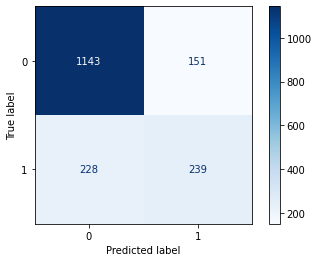

In [9]:
plot_confusion_matrix(lr_model, x_test, y_test, cmap='Blues')

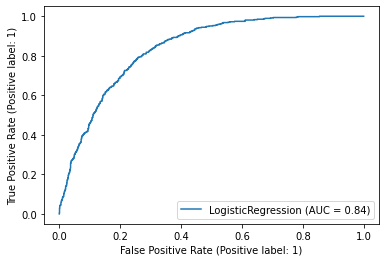

In [10]:
roc = plot_roc_curve(lr_model, x_test, y_test)

In [11]:
lr_model.predict_proba(x_test)[:5]

array([[0.90753212, 0.09246788],
       [0.92455531, 0.07544469],
       [0.92686098, 0.07313902],
       [0.30384094, 0.69615906],
       [0.98167831, 0.01832169]])

In [12]:
lr_model.predict(x_test)[:5]

array([0, 0, 0, 1, 0])

In [13]:
(lr_model.predict_proba(x_test)[:5, 1] > 0.5).astype('int')

array([0, 0, 0, 1, 0])

In [14]:
predictions_lower_thresh = (lr_model.predict_proba(x_test)[:, 1] > 0.13).astype('int')

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix

print(accuracy_score(y_test, predictions_lower_thresh))
tn, fp, fn, tp  = confusion_matrix(y_test, predictions_lower_thresh).flatten()
print(tp / (tp + fn))

0.6433844406587166
0.9421841541755889


In [16]:
lr_model.coef_

array([[-5.51044271e-02, -6.16666273e-01, -1.12191253e+00,
        -2.67045330e-01,  2.32104369e-02,  2.84326135e-04,
         1.58239781e-01]])

In [17]:
features.columns

Index(['tenure', 'PhoneService', 'Contract', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'AutoPay'],
      dtype='object')

In [18]:
coef_df = pd.DataFrame(data=lr_model.coef_, columns=features.columns)

<AxesSubplot:>

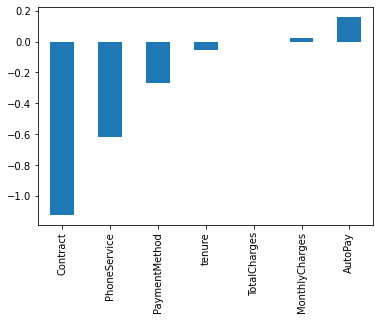

In [19]:
coef_df.T.sort_values(by=0).plot.bar(legend=False)

## Ensemble Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [21]:
rf_model = RandomForestClassifier(max_depth=5, n_jobs=-1, random_state=42)
rf_model.fit(x_train, y_train)

rf_predict = rf_model.predict(x_test)
train_rf_predict = rf_model.predict(x_train)

rf_accuracy = accuracy_score(y_test, rf_predict)
train_rf_accuracy = accuracy_score(y_train, train_rf_predict)

In [22]:
print(f'Random Forest test accuracy {rf_accuracy:.4f}')
print(f'Random Forest train accuracy {train_rf_accuracy:.4f}')

Random Forest test accuracy 0.7950
Random Forest train accuracy 0.8056


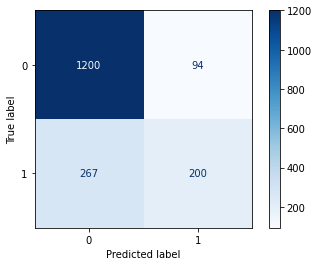

In [23]:
plot_confusion_matrix(rf_model, x_test, y_test, cmap='Blues')

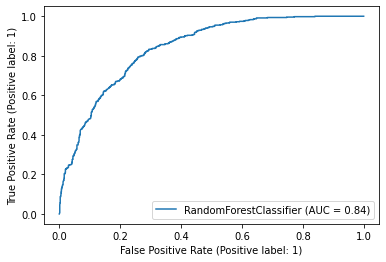

In [24]:
roc = plot_roc_curve(rf_model, x_test, y_test)

### Ensemble Gradient Boosting

In [25]:
gb_model = GradientBoostingClassifier(max_depth=4, random_state=42)
gb_model.fit(x_train, y_train)

gb_predict = rf_model.predict(x_test)
train_gb_predict = rf_model.predict(x_train)

gb_accuracy = accuracy_score(y_test, gb_predict)
train_gb_accuracy = accuracy_score(y_train, train_gb_predict)

In [26]:
print(f'Gradient Boost test accuracy {gb_accuracy:.4f}')
print(f'Gradient Boost train accuracy {train_gb_accuracy:.4f}')

Gradient Boost test accuracy 0.7950
Gradient Boost train accuracy 0.8056


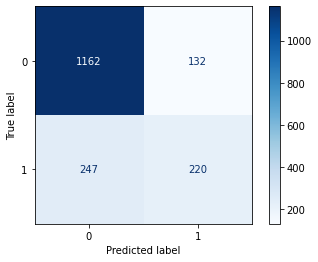

In [27]:
plot_confusion_matrix(gb_model, x_test, y_test, cmap='Blues')

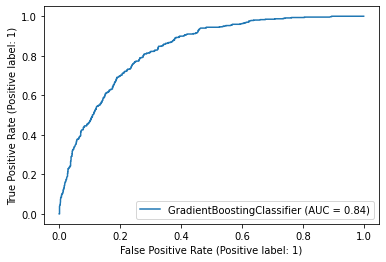

In [28]:
roc = plot_roc_curve(gb_model, x_test, y_test)

### XGBoost Classifier

In [29]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier()
xgb_model.fit(x_train, y_train)

xgb_predict = xgb_model.predict(x_test)
train_xgb_predict = xgb_model.predict(x_train)

xgb_accuracy = accuracy_score(y_test, xgb_predict)
train_xgb_accuracy = accuracy_score(y_train, train_xgb_predict)

/home/tosterberg/.local/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/home/tosterberg/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/tosterberg/.local/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int6

[11:38:51] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [30]:
print(f'XGBoost Classifier test accuracy {xgb_accuracy:.4f}')
print(f'XGBoost Classifier train accuracy {train_xgb_accuracy:.4f}')

XGBoost Classifier test accuracy 0.7785
XGBoost Classifier train accuracy 0.9093


/home/tosterberg/.local/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


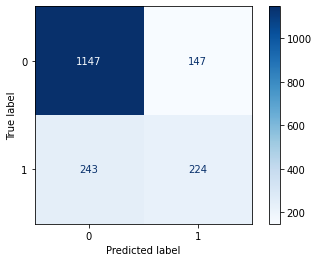

In [31]:
plot_confusion_matrix(xgb_model, x_test, y_test, cmap='Blues')

/home/tosterberg/.local/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


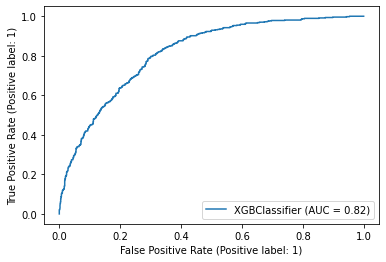

In [32]:
roc = plot_roc_curve(xgb_model, x_test, y_test)

### Auto-Sklearn Classifier

In [33]:
import autosklearn.classification

cls_model = autosklearn.classification.AutoSklearnClassifier()
cls_model.time_left_for_this_task = 300
cls_model.fit(x_train, y_train)

cls_predict = cls_model.predict(x_test)
train_cls_predict = cls_model.predict(x_train)

auto_cls_accuracy = accuracy_score(y_test, cls_predict)
train_auto_cls_accuracy = accuracy_score(y_train, train_cls_predict)

/home/tosterberg/.local/lib/python3.8/site-packages/autosklearn/metalearning/metalearning/meta_base.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.metafeatures = self.metafeatures.append(metafeatures)
/home/tosterberg/.local/lib/python3.8/site-packages/autosklearn/metalearning/metalearning/meta_base.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.algorithm_runs[metric].append(runs)


In [34]:
print(f'auto-sklearn test accuracy {auto_cls_accuracy:.4f}')
print(f'auto-sklearn train accuracy {train_auto_cls_accuracy:.4f}')

auto-sklearn test accuracy 0.7950
auto-sklearn train accuracy 0.8245


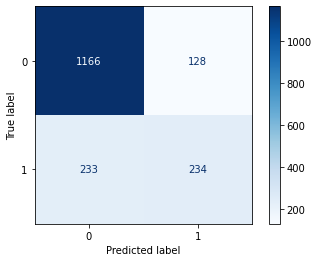

In [35]:
plot_confusion_matrix(cls_model, x_test, y_test, cmap='Blues')

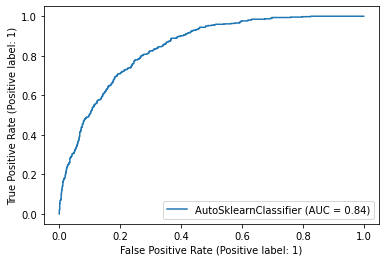

In [36]:
roc = plot_roc_curve(cls_model, x_test, y_test)

### Final graphs for Logistic Regression

In [42]:
probabilities = lr_model.predict_proba(x_test)[:, 1]

In [43]:
prob_df = pd.DataFrame(data={'predicted_probability': probabilities, 'target': y_test})

<AxesSubplot:xlabel='predicted_probability', ylabel='Density'>

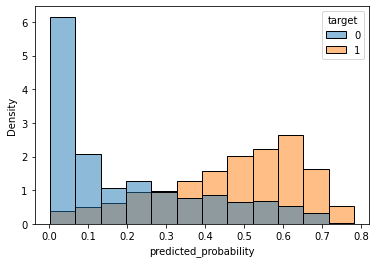

In [44]:
import seaborn as sns

sns.histplot(data=prob_df, x='predicted_probability', hue='target', stat='density', common_norm=False)

## 6. Deployment

With a model that is giving us just shy of 80% accuracy and the relative equivalence of the various model implementations that we have tried my first thought would be to implement the most lightweight algorithm into an API.  The most likely business case for this prediction would be to setup an endpoint, probably REST, and allow a GET request with the customer features that we want to predict Churn likelihood for.  The model would respond with the prediction and that would steer some kind of retention action that the business can take.  Although we don't have a specific technology stack for this use case my first thought would be to set this up as a servless function inside of Azure / AWS / Google Cloud.  The long term maintainence of the function would be handled by periodic refitting and cross validation as we collect more data.  This would allow us to swap out to a more performant model should one become more accurate as we accumulate more data.

The issues with this kind of deployment would be that once we starting applying the treatment to those that we think would churn, the future data would not have exactly the same constraints and interactions so the model is likely have accuracy drift over time.  With that in mind the way that we future proof the model would have to account for that with cross validation, enrichment, retraining with new data, and finally observing the effects of any treatment given to the likely to churn group.

# Summary


Churn, as represented in the data set given for this assignment appears to be predictable up to around 79.5% using gradient boosting or random forest ensemble methods with logistic regression with only slightly lower performance of around 78.5%.  The ability for the logistic regression classification to perform so well shows a strong signal in the data for this to be predictable and further increases in the prediction accuracy would likely need to come from trying additional feature engineering, enriching the dataset, or collecting more data.